In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [10]:
df_spectral = pd.read_csv(r"F:\wenqu\Aviris\site1b\2017_site1b_aviris_band_data.csv")
df_spectral

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_10_21.tif,0.004095,0.008366,0.011143,0.012064,0.014178,0.016157,0.019465,0.019648,0.021816,...,0.032876,0.031840,0.031030,0.032435,0.039850,0.046477,0.122873,0.289441,0.113001,0.091605
1,site1b_10_24.tif,0.010162,0.017987,0.010830,0.017021,0.017567,0.016379,0.019352,0.020424,0.023193,...,0.026392,0.027079,0.032499,0.035687,0.030389,0.067178,0.088952,0.144447,0.125137,0.064748
2,site1b_10_25.tif,0.006902,0.009180,0.011334,0.013874,0.017388,0.015369,0.017985,0.020031,0.023258,...,0.036849,0.027824,0.032534,0.039909,0.032636,0.055107,0.040646,0.173911,0.154935,0.074669
3,site1b_10_26.tif,0.005427,0.008547,0.010773,0.014396,0.014228,0.014790,0.017349,0.020693,0.022823,...,0.031407,0.031854,0.035131,0.037115,0.037787,0.051414,0.072393,0.287284,0.121171,0.080450
4,site1b_10_27.tif,0.010331,0.012824,0.012874,0.013316,0.016856,0.018601,0.019378,0.022326,0.022935,...,0.030785,0.026421,0.027614,0.036539,0.034287,0.051169,0.111973,0.171473,0.108602,0.083328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,site1b_9_30.tif,-0.001851,0.002005,0.007812,0.005726,0.011073,0.010525,0.013337,0.016856,0.019017,...,0.022529,0.021038,0.026056,0.033581,0.032948,0.045921,0.123889,0.294692,0.107393,0.073712
2406,site1b_9_31.tif,0.001136,0.006393,0.012069,0.009608,0.011677,0.015155,0.016538,0.019763,0.021325,...,0.029671,0.029151,0.029339,0.038643,0.043471,0.025427,0.177701,0.275321,0.193168,0.067007
2407,site1b_9_32.tif,0.001907,0.010018,0.013402,0.012623,0.017233,0.017980,0.018980,0.021182,0.023590,...,0.030255,0.035996,0.030413,0.035663,0.035428,0.043966,0.117660,0.174336,0.093757,0.081126
2408,site1b_9_33.tif,0.009831,0.005109,0.010826,0.010529,0.014116,0.014191,0.016041,0.018058,0.018678,...,0.031930,0.031863,0.031260,0.041950,0.030634,0.044106,0.165172,0.088788,0.202451,0.058483


In [15]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [16]:
len(band_name)

319

In [17]:
x_spectra = df_spectral[band_name]
x = x_spectra.to_numpy()

In [18]:
x.shape

(2410, 319)

In [19]:
# Define Gaussian function
def gaussian(x, mean, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-mean)**2/(2*sigma**2))

In [23]:
la_trait_pdf = []
for file_name in df_spectral['filename']:
    file_name = 'site1b_d15n_' + file_name
    print(file_name)
    file_name = 'F:/wenqu/trait_map/trait_clip/site1b_d15n/'  + file_name
    x_data = gdal.Open(file_name).ReadAsArray()
    x_data = x_data.flatten()
    
    hist, bin_edges = np.histogram(x_data)
    hist=hist/sum(hist)
    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    # middle value for each bin, has the same shape as y_hist
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    # number of values falling into each bins - probability     
    y_hist=hist
    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist)
#     p0=[max(y_hist)]

#     p0=[max(y_hist),mean,sigma]



    la_trait_pdf.append(mean)


site1b_d15n_site1b_10_21.tif
site1b_d15n_site1b_10_24.tif
site1b_d15n_site1b_10_25.tif
site1b_d15n_site1b_10_26.tif
site1b_d15n_site1b_10_27.tif
site1b_d15n_site1b_10_28.tif
site1b_d15n_site1b_10_29.tif
site1b_d15n_site1b_10_30.tif
site1b_d15n_site1b_10_31.tif
site1b_d15n_site1b_10_35.tif
site1b_d15n_site1b_10_36.tif
site1b_d15n_site1b_11_27.tif
site1b_d15n_site1b_11_28.tif
site1b_d15n_site1b_11_29.tif
site1b_d15n_site1b_11_30.tif
site1b_d15n_site1b_11_32.tif
site1b_d15n_site1b_11_35.tif
site1b_d15n_site1b_11_36.tif
site1b_d15n_site1b_11_37.tif
site1b_d15n_site1b_11_38.tif
site1b_d15n_site1b_11_39.tif
site1b_d15n_site1b_12_21.tif
site1b_d15n_site1b_12_22.tif
site1b_d15n_site1b_12_23.tif
site1b_d15n_site1b_12_29.tif
site1b_d15n_site1b_12_30.tif
site1b_d15n_site1b_12_32.tif
site1b_d15n_site1b_12_34.tif
site1b_d15n_site1b_12_35.tif
site1b_d15n_site1b_12_36.tif
site1b_d15n_site1b_12_37.tif
site1b_d15n_site1b_12_38.tif
site1b_d15n_site1b_12_39.tif
site1b_d15n_site1b_12_40.tif
site1b_d15n_si

site1b_d15n_site1b_23_44.tif
site1b_d15n_site1b_23_50.tif
site1b_d15n_site1b_23_51.tif
site1b_d15n_site1b_23_52.tif
site1b_d15n_site1b_23_53.tif
site1b_d15n_site1b_23_54.tif
site1b_d15n_site1b_23_55.tif
site1b_d15n_site1b_23_56.tif
site1b_d15n_site1b_23_57.tif
site1b_d15n_site1b_23_58.tif
site1b_d15n_site1b_23_59.tif
site1b_d15n_site1b_23_60.tif
site1b_d15n_site1b_23_61.tif
site1b_d15n_site1b_23_73.tif
site1b_d15n_site1b_23_74.tif
site1b_d15n_site1b_23_75.tif
site1b_d15n_site1b_24_18.tif
site1b_d15n_site1b_24_19.tif
site1b_d15n_site1b_24_20.tif
site1b_d15n_site1b_24_21.tif
site1b_d15n_site1b_24_22.tif
site1b_d15n_site1b_24_23.tif
site1b_d15n_site1b_24_24.tif
site1b_d15n_site1b_24_29.tif
site1b_d15n_site1b_24_30.tif
site1b_d15n_site1b_24_31.tif
site1b_d15n_site1b_24_35.tif
site1b_d15n_site1b_24_36.tif
site1b_d15n_site1b_24_37.tif
site1b_d15n_site1b_24_38.tif
site1b_d15n_site1b_24_39.tif
site1b_d15n_site1b_24_40.tif
site1b_d15n_site1b_24_41.tif
site1b_d15n_site1b_24_42.tif
site1b_d15n_si

site1b_d15n_site1b_31_87.tif
site1b_d15n_site1b_31_88.tif
site1b_d15n_site1b_31_89.tif
site1b_d15n_site1b_32_20.tif
site1b_d15n_site1b_32_24.tif
site1b_d15n_site1b_32_25.tif
site1b_d15n_site1b_32_26.tif
site1b_d15n_site1b_32_27.tif
site1b_d15n_site1b_32_28.tif
site1b_d15n_site1b_32_29.tif
site1b_d15n_site1b_32_36.tif
site1b_d15n_site1b_32_37.tif
site1b_d15n_site1b_32_38.tif
site1b_d15n_site1b_32_39.tif
site1b_d15n_site1b_32_40.tif
site1b_d15n_site1b_32_41.tif
site1b_d15n_site1b_32_42.tif
site1b_d15n_site1b_32_43.tif
site1b_d15n_site1b_32_44.tif
site1b_d15n_site1b_32_45.tif
site1b_d15n_site1b_32_46.tif
site1b_d15n_site1b_32_51.tif
site1b_d15n_site1b_32_52.tif
site1b_d15n_site1b_32_53.tif
site1b_d15n_site1b_32_54.tif
site1b_d15n_site1b_32_55.tif
site1b_d15n_site1b_32_56.tif
site1b_d15n_site1b_32_57.tif
site1b_d15n_site1b_32_69.tif
site1b_d15n_site1b_32_70.tif
site1b_d15n_site1b_32_71.tif
site1b_d15n_site1b_32_72.tif
site1b_d15n_site1b_32_73.tif
site1b_d15n_site1b_32_74.tif
site1b_d15n_si

site1b_d15n_site1b_37_90.tif
site1b_d15n_site1b_37_91.tif
site1b_d15n_site1b_37_92.tif
site1b_d15n_site1b_37_93.tif
site1b_d15n_site1b_37_94.tif
site1b_d15n_site1b_37_95.tif
site1b_d15n_site1b_37_96.tif
site1b_d15n_site1b_37_97.tif
site1b_d15n_site1b_38_12.tif
site1b_d15n_site1b_38_13.tif
site1b_d15n_site1b_38_14.tif
site1b_d15n_site1b_38_15.tif
site1b_d15n_site1b_38_16.tif
site1b_d15n_site1b_38_17.tif
site1b_d15n_site1b_38_18.tif
site1b_d15n_site1b_38_19.tif
site1b_d15n_site1b_38_20.tif
site1b_d15n_site1b_38_21.tif
site1b_d15n_site1b_38_22.tif
site1b_d15n_site1b_38_23.tif
site1b_d15n_site1b_38_24.tif
site1b_d15n_site1b_38_30.tif
site1b_d15n_site1b_38_31.tif
site1b_d15n_site1b_38_32.tif
site1b_d15n_site1b_38_38.tif
site1b_d15n_site1b_38_39.tif
site1b_d15n_site1b_38_40.tif
site1b_d15n_site1b_38_46.tif
site1b_d15n_site1b_38_47.tif
site1b_d15n_site1b_38_48.tif
site1b_d15n_site1b_38_49.tif
site1b_d15n_site1b_38_50.tif
site1b_d15n_site1b_38_51.tif
site1b_d15n_site1b_38_52.tif
site1b_d15n_si

site1b_d15n_site1b_43_76.tif
site1b_d15n_site1b_43_77.tif
site1b_d15n_site1b_43_78.tif
site1b_d15n_site1b_43_79.tif
site1b_d15n_site1b_43_84.tif
site1b_d15n_site1b_43_85.tif
site1b_d15n_site1b_43_86.tif
site1b_d15n_site1b_43_87.tif
site1b_d15n_site1b_43_88.tif
site1b_d15n_site1b_43_89.tif
site1b_d15n_site1b_43_90.tif
site1b_d15n_site1b_43_91.tif
site1b_d15n_site1b_43_92.tif
site1b_d15n_site1b_43_96.tif
site1b_d15n_site1b_43_97.tif
site1b_d15n_site1b_43_98.tif
site1b_d15n_site1b_43_99.tif
site1b_d15n_site1b_44_100.tif
site1b_d15n_site1b_44_101.tif
site1b_d15n_site1b_44_24.tif
site1b_d15n_site1b_44_25.tif
site1b_d15n_site1b_44_26.tif
site1b_d15n_site1b_44_27.tif
site1b_d15n_site1b_44_28.tif
site1b_d15n_site1b_44_29.tif
site1b_d15n_site1b_44_30.tif
site1b_d15n_site1b_44_32.tif
site1b_d15n_site1b_44_33.tif
site1b_d15n_site1b_44_34.tif
site1b_d15n_site1b_44_35.tif
site1b_d15n_site1b_44_41.tif
site1b_d15n_site1b_44_42.tif
site1b_d15n_site1b_44_43.tif
site1b_d15n_site1b_44_44.tif
site1b_d15n_

site1b_d15n_site1b_50_82.tif
site1b_d15n_site1b_50_83.tif
site1b_d15n_site1b_50_84.tif
site1b_d15n_site1b_50_85.tif
site1b_d15n_site1b_50_86.tif
site1b_d15n_site1b_50_87.tif
site1b_d15n_site1b_50_88.tif
site1b_d15n_site1b_50_92.tif
site1b_d15n_site1b_50_93.tif
site1b_d15n_site1b_50_94.tif
site1b_d15n_site1b_50_95.tif
site1b_d15n_site1b_50_96.tif
site1b_d15n_site1b_50_97.tif
site1b_d15n_site1b_50_98.tif
site1b_d15n_site1b_50_99.tif
site1b_d15n_site1b_51_100.tif
site1b_d15n_site1b_51_101.tif
site1b_d15n_site1b_51_102.tif
site1b_d15n_site1b_51_109.tif
site1b_d15n_site1b_51_110.tif
site1b_d15n_site1b_51_38.tif
site1b_d15n_site1b_51_39.tif
site1b_d15n_site1b_51_40.tif
site1b_d15n_site1b_51_41.tif
site1b_d15n_site1b_51_44.tif
site1b_d15n_site1b_51_45.tif
site1b_d15n_site1b_51_46.tif
site1b_d15n_site1b_51_47.tif
site1b_d15n_site1b_51_48.tif
site1b_d15n_site1b_51_49.tif
site1b_d15n_site1b_51_60.tif
site1b_d15n_site1b_51_61.tif
site1b_d15n_site1b_51_65.tif
site1b_d15n_site1b_51_66.tif
site1b_d1

site1b_d15n_site1b_58_86.tif
site1b_d15n_site1b_58_87.tif
site1b_d15n_site1b_58_91.tif
site1b_d15n_site1b_58_92.tif
site1b_d15n_site1b_58_93.tif
site1b_d15n_site1b_58_94.tif
site1b_d15n_site1b_58_95.tif
site1b_d15n_site1b_58_96.tif
site1b_d15n_site1b_58_97.tif
site1b_d15n_site1b_58_98.tif
site1b_d15n_site1b_59_104.tif
site1b_d15n_site1b_59_105.tif
site1b_d15n_site1b_59_108.tif
site1b_d15n_site1b_59_109.tif
site1b_d15n_site1b_59_111.tif
site1b_d15n_site1b_59_67.tif
site1b_d15n_site1b_59_68.tif
site1b_d15n_site1b_59_69.tif
site1b_d15n_site1b_59_70.tif
site1b_d15n_site1b_59_71.tif
site1b_d15n_site1b_59_72.tif
site1b_d15n_site1b_59_73.tif
site1b_d15n_site1b_59_74.tif
site1b_d15n_site1b_59_75.tif
site1b_d15n_site1b_59_76.tif
site1b_d15n_site1b_59_80.tif
site1b_d15n_site1b_59_81.tif
site1b_d15n_site1b_59_82.tif
site1b_d15n_site1b_59_83.tif
site1b_d15n_site1b_59_84.tif
site1b_d15n_site1b_59_85.tif
site1b_d15n_site1b_59_86.tif
site1b_d15n_site1b_59_87.tif
site1b_d15n_site1b_59_88.tif
site1b_d1

site1b_d15n_site1b_77_80.tif
site1b_d15n_site1b_77_81.tif
site1b_d15n_site1b_77_82.tif
site1b_d15n_site1b_77_83.tif
site1b_d15n_site1b_77_84.tif
site1b_d15n_site1b_77_85.tif
site1b_d15n_site1b_77_86.tif
site1b_d15n_site1b_77_91.tif
site1b_d15n_site1b_77_92.tif
site1b_d15n_site1b_77_93.tif
site1b_d15n_site1b_77_94.tif
site1b_d15n_site1b_77_95.tif
site1b_d15n_site1b_77_96.tif
site1b_d15n_site1b_77_97.tif
site1b_d15n_site1b_77_98.tif
site1b_d15n_site1b_78_79.tif
site1b_d15n_site1b_78_80.tif
site1b_d15n_site1b_78_81.tif
site1b_d15n_site1b_78_82.tif
site1b_d15n_site1b_78_83.tif
site1b_d15n_site1b_78_84.tif
site1b_d15n_site1b_78_85.tif
site1b_d15n_site1b_78_86.tif
site1b_d15n_site1b_78_87.tif
site1b_d15n_site1b_78_88.tif
site1b_d15n_site1b_78_92.tif
site1b_d15n_site1b_78_93.tif
site1b_d15n_site1b_78_94.tif
site1b_d15n_site1b_78_95.tif
site1b_d15n_site1b_79_80.tif
site1b_d15n_site1b_79_81.tif
site1b_d15n_site1b_79_82.tif
site1b_d15n_site1b_79_83.tif
site1b_d15n_site1b_79_84.tif
site1b_d15n_si

In [24]:
la_trait_pdf

[0.18266336221388252,
 0.037592774513689524,
 0.0879668824701785,
 0.08264547185802541,
 0.06952401759198597,
 0.0955160423257129,
 0.19100574325013323,
 0.22789049520068086,
 0.11684114077175582,
 0.05573692820048757,
 0.09051626096028129,
 0.13619215960271286,
 0.19093495790038195,
 0.19473307810650498,
 0.10565117573835177,
 0.074454324666715,
 0.03910711352392012,
 0.04540703914470661,
 0.06425243473657312,
 0.08543855743244588,
 0.05557134241917385,
 0.07691500940538154,
 0.06769573241113024,
 0.0546523417235115,
 0.049314639316753214,
 0.08016241990645932,
 0.07463231891602118,
 0.03375054263893087,
 0.04053600173285988,
 0.05215344198171393,
 0.067943620188132,
 0.130133438312215,
 0.09686872079208118,
 0.062267998277747184,
 0.05855003359699991,
 0.099808449050056,
 0.049277394388704585,
 0.02693707884615005,
 0.09507463901785713,
 0.15260503086377727,
 0.178153947004071,
 0.07387237348447838,
 0.06390653520514562,
 0.060084913736890164,
 0.04354523062213579,
 0.020592284357136

In [25]:
y = la_trait_pdf
y = np.array(y)


In [26]:
y.shape

(2410,)

In [27]:
print(y.dtype)

float64


In [28]:
y.shape, x.shape

((2410,), (2410, 319))

In [29]:
band_name = np.array(band_name)

In [30]:
# Python
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
 
 
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [31]:
def simple_pls_cv(X, y, n_comp):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
        # Plot regression 
 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        
        plt.show()

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


3% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  268
Optimised MSEP  0.0009298831994599255

R2 calib: 0.411
R2 CV: 0.339
MSE calib: 0.001
MSE CV: 0.001


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


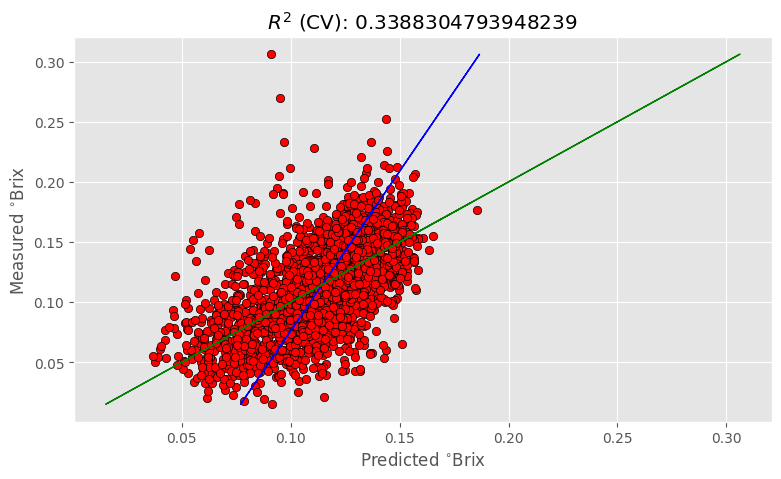

In [32]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x, y, 30)
simple_pls_cv(opt_Xc, y, ncomp)